In [1]:
import pandas as pd
import numpy as np
import ast
from typing import Dict, List

pd.set_option("display.precision", 6)
pd.set_option("display.max_columns", None)
pd.options.mode.chained_assignment = None

# Preproccessing

## FIGHTERS preproccessing

In [254]:
fighters_df = pd.read_csv("data/0.fighters_raw.csv", index_col=0)
fighters_df["dateOfBirth"] = pd.to_datetime(fighters_df["dateOfBirth"])
fighters_cols = [
    "id",
    "name",
    "weight",
    "height",
    "armSpan",
    "legSwing",
    "weightCategory.id",
    "weightCategory.name",
    "dateOfBirth",
    "country",
    "city",
    "timezone",
]
fighters_df = fighters_df[fighters_cols]
fighters_df.set_index("id", inplace=True)
fighters_df.head(5)

,name,weight,height,armSpan,legSwing,weightCategory.id,weightCategory.name,dateOfBirth,country,city,timezone
id,,,,,,,,,,,
1,Tanner Boser,115.67,187.96,190.50,NaN,9,Тяжелый вес,1991-08-02,Canada,Bonnyville,America/Edmonton
2,Giacomo Lemos,112.04,190.50,190.50,NaN,9,Тяжелый вес,1989-06-23,Brazil,NaN,America/Sao_Paulo
3,Shamil Abdurakhimov,106.59,190.50,193.04,105.41,9,Тяжелый вес,1981-09-02,Dagestan,Makhachkala,Europe/Moscow
4,Klidson Abreu,92.99,182.88,187.96,NaN,8,Полутяжелый вес,1992-12-24,Brazil,Manaus,America/Manaus
5,Yoshihiro Akiyama,77.11,177.80,190.50,106.68,6,Полусредний вес,1975-07-29,Japan,Ikuno,Asia/Tokyo


#### Исправляем поле `country` для бойцов из США

In [3]:
usa_state_names = [
    "Alaska",
    "Alabama",
    "Arkansas",
    "American Samoa",
    "Arizona",
    "California",
    "Colorado",
    "Connecticut",
    "District ",
    "of Columbia",
    "Delaware",
    "Florida",
    "Georgia",
    "Guam",
    "Hawaii",
    "Iowa",
    "Idaho",
    "Illinois",
    "Indiana",
    "Kansas",
    "Kentucky",
    "Louisiana",
    "Massachusetts",
    "Maryland",
    "Maine",
    "Michigan",
    "Minnesota",
    "Missouri",
    "Mississippi",
    "Montana",
    "North Carolina",
    "North Dakota",
    "Nebraska",
    "New Hampshire",
    "New Jersey",
    "New Mexico",
    "Nevada",
    "New York",
    "Ohio",
    "Oklahoma",
    "Oregon",
    "Pennsylvania",
    "Puerto Rico",
    "Rhode Island",
    "South Carolina",
    "South Dakota",
    "Tennessee",
    "Texas",
    "Utah",
    "Virginia",
    "Virgin Islands",
    "Vermont",
    "Washington",
    "Wisconsin",
    "West Virginia",
    "Wyoming",
]
fighters_df.loc[fighters_df["country"] == "United States", "country"] = "USA"
fighters_df.loc[fighters_df["country"].isin(usa_state_names), "country"] = "USA"
fighters_df.head(5)

,name,weight,height,armSpan,legSwing,weightCategory.id,weightCategory.name,dateOfBirth,country,city,timezone
id,,,,,,,,,,,
1,Tanner Boser,115.67,187.96,190.50,NaN,9,Тяжелый вес,1991-08-02,Canada,Bonnyville,America/Edmonton
2,Giacomo Lemos,112.04,190.50,190.50,NaN,9,Тяжелый вес,1989-06-23,Brazil,NaN,America/Sao_Paulo
3,Shamil Abdurakhimov,106.59,190.50,193.04,105.41,9,Тяжелый вес,1981-09-02,Dagestan,Makhachkala,Europe/Moscow
4,Klidson Abreu,92.99,182.88,187.96,NaN,8,Полутяжелый вес,1992-12-24,Brazil,Manaus,America/Manaus
5,Yoshihiro Akiyama,77.11,177.80,190.50,106.68,6,Полусредний вес,1975-07-29,Japan,Ikuno,Asia/Tokyo


## Заполняем пропуски в колонках

In [91]:
# найти всех тех, у кого не заполнен вес, рост, арм спен, и легсвинг
# из другого надафрейма найти айдишник файтера, посмотреть на его противников и взять его средний вес, либо взять первый попавшийся вес, 
fighters_df[['height', 'weight', 'armSpan', 'legSwing']].isna().sum()

height       334
weight       139
armSpan     1942
legSwing    2895
dtype: int64

### Выбросы размаха ног меняем на NaN, для дальнейшей обработки

In [260]:
fighters_df.replace(fighters_df.legSwing.max(), np.nan, inplace=True)
fighters_df.replace(fighters_df.legSwing.min(), np.nan, inplace=True)

### Убираем строки с выбросами роста

In [287]:
fighters_df = fighters_df[fighters_df['height'] < 230]
fighters_df = fighters_df[fighters_df['height'] > 145]

### Убираем строки с выбросами веса

In [303]:
fighters_df = fighters_df[fighters_df['weight'] > 47]
fighters_df = fighters_df[fighters_df['weight'] < 250]

### **Заполняем пропуски в колонках**

### Находим все возможные весовые категории

In [220]:
avg_weight_in_weight_category = fighters_df.groupby(by="weightCategory.id").mean()['weight']
avg_weight_in_weight_category

weightCategory.id
2.0      57.054531
3.0      61.127215
4.0      64.162735
5.0      70.400699
6.0      72.185989
7.0      80.679014
8.0      92.208756
9.0     108.321471
10.0     52.427949
11.0     56.808095
12.0     61.131190
13.0     63.253333
14.0     89.994459
Name: weight, dtype: float64

### Замена пустых значений веса на среднее по весовой категории

In [328]:
fighters_df.fighterId

AttributeError: AttributeError: 'DataFrame' object has no attribute 'fighterId'

### Замена пустых значений роста на размах рук

In [308]:
fighters_df.armSpan

id
1       190.50
2       190.50
3       193.04
4       187.96
5       190.50
         ...  
3673       NaN
3674       NaN
3675       NaN
3676       NaN
3677       NaN
Name: armSpan, Length: 3315, dtype: float64

In [313]:
fighters_df.head()

,name,weight,height,armSpan,legSwing,weightCategory.id,weightCategory.name,dateOfBirth,country,city,timezone
id,,,,,,,,,,,
1,Tanner Boser,115.67,187.96,190.50,NaN,9,Тяжелый вес,1991-08-02,Canada,Bonnyville,America/Edmonton
2,Giacomo Lemos,112.04,190.50,190.50,NaN,9,Тяжелый вес,1989-06-23,Brazil,NaN,America/Sao_Paulo
3,Shamil Abdurakhimov,106.59,190.50,193.04,105.41,9,Тяжелый вес,1981-09-02,Dagestan,Makhachkala,Europe/Moscow
4,Klidson Abreu,92.99,182.88,187.96,NaN,8,Полутяжелый вес,1992-12-24,Brazil,Manaus,America/Manaus
5,Yoshihiro Akiyama,77.11,177.80,190.50,106.68,6,Полусредний вес,1975-07-29,Japan,Ikuno,Asia/Tokyo


In [327]:
i=1
while i < fighters_df.shape[0]:
    if events_df.f1_name.iloc[i] == fighters_df.name.iloc[i]:
        print(events_df.f1_name.iloc[i])
    i+=1

while i < fighters_df.shape[0]:
    if events_df.f2_name.iloc[i] == fighters_df.name.iloc[i]:
        print(events_df.f2_name.iloc[i])
    i+=1

BJ Penn
Yoshiro Maeda


In [312]:
events_df.f1_armSpan.value_counts()

177.80    681
185.42    650
190.50    640
187.96    628
182.88    607
180.34    537
193.04    470
175.26    371
172.72    359
195.58    320
170.18    267
167.64    205
198.12    186
165.10    151
200.66    141
203.20    137
162.56    104
187.96     86
160.02     77
180.34     75
172.72     50
157.48     43
213.36     34
205.74     26
208.28     21
193.04     20
210.82     12
152.40      9
195.58      8
208.28      7
165.10      6
200.66      4
154.94      4
169.00      2
160.02      2
226.06      2
165.00      1
218.44      1
185.00      1
183.00      1
Name: f1_armSpan, dtype: int64

In [222]:
def replace_null_height_to_arm_span(row):
    if np.isnan(row['height']) and row['armSpan']:
        arm_span = row['armSpan']
        return arm_span
    return row['height']

fighters_df['height'] = fighters_df.apply(
    lambda row: replace_null_height_to_arm_span(row),
    axis=1
)

### Замена пустых значений размаха рук на рост

In [212]:
def replace_null_arm_span_to_height(row):
    if np.isnan(row['armSpan']) and row['height']:
        height = row['height']
        return height
    return row['armSpan']

fighters_df['armSpan'] = fighters_df.apply(
    lambda row: replace_null_arm_span_to_height(row),
    axis=1
)

### Убираем пустые значения размаха ног, средним по колонке

In [150]:
fighters_df['legSwing'].fillna(np.round(fighters_df['legSwing'].mean(), 1), inplace=True)

### Пропуски
- пропуски в росте и весе заполнить средними в весовой категории
- пропуски в размахе рук и ног заполнить средним для похожего роста

## EVENTS preproccessing

In [8]:
events_df = pd.read_csv("data/0.events_raw.csv", index_col=0)
events_df["eventDate.date"] = pd.to_datetime(events_df["eventDate.date"])
events_df.set_index("id", inplace=True)
events_df.drop(events_df[events_df["completed"] == False].index, inplace=True)
events_df.drop(events_df[events_df["winnerId"].isna()].index, inplace=True)
events_df.drop(
    columns=["completed", "eventDate.timezone", "eventDate.timezone_type", "link"],
    inplace=True,
)
events_df.head(5)

,avgOdds,city,country,duration,eventDate.date,fighterId_1,fighterId_2,fighters,name,rounds,timezone,weightCategory.id,weightCategory.name,winMethods,winnerId
id,,,,,,,,,,,,,,,
5201,[],Denver,USA,104.0,1993-11-12,1646,1923,"[{'fighterId': 1646, 'fightStats': {'hitsTotal...",UFC 1,1.0,America/Denver,7,Средний вес,['SUB'],1646.0
5202,[],Denver,USA,52.0,1993-11-12,1777,1883,"[{'fighterId': 1777, 'fightStats': {'hitsTotal...",UFC 1,1.0,America/Denver,8,Полутяжелый вес,['SUB'],1777.0
5203,[],Denver,USA,59.0,1993-11-12,1908,1923,"[{'fighterId': 1908, 'fightStats': {'hitsTotal...",UFC 1,1.0,America/Denver,9,Тяжелый вес,['KO'],1923.0
5204,[],Denver,USA,57.0,1993-11-12,1631,1646,"[{'fighterId': 1631, 'fightStats': {'hitsTotal...",UFC 1,1.0,America/Denver,8,Полутяжелый вес,['SUB'],1646.0
5205,[],Denver,USA,138.0,1993-11-12,1646,1924,"[{'fighterId': 1646, 'fightStats': {'hitsTotal...",UFC 1,1.0,America/Denver,7,Средний вес,['SUB'],1646.0


#### Парсим колонку `avgOdds`

In [9]:
def parse_odds(row: pd.Series) -> pd.Series:
    """
    Parse 'avgOdds' column.
    :param row: Row of the events dataframe.
    :return: pd.Series with odds for the 1st and the 2nd fighters.
    """
    avg_odds = row["avgOdds"]
    if avg_odds == "[]" or avg_odds == np.nan:
        return pd.Series([np.nan] * 2)
    avg_odds = ast.literal_eval(avg_odds)
    if avg_odds[0]["fighterId"] == row["fighterId_1"]:
        return pd.Series([f.get("value", np.nan) for f in avg_odds])
    else:
        return pd.Series([f.get("value", np.nan) for f in reversed(avg_odds)])

In [10]:
events_df[["f1_odds", "f2_odds"]] = events_df[
    ["avgOdds", "fighterId_1", "fighterId_2"]
].apply(lambda row: parse_odds(row), axis=1)
events_df.drop(columns="avgOdds", inplace=True)
events_df.head(5)

,city,country,duration,eventDate.date,fighterId_1,fighterId_2,fighters,name,rounds,timezone,weightCategory.id,weightCategory.name,winMethods,winnerId,f1_odds,f2_odds
id,,,,,,,,,,,,,,,,
5201,Denver,USA,104.0,1993-11-12,1646,1923,"[{'fighterId': 1646, 'fightStats': {'hitsTotal...",UFC 1,1.0,America/Denver,7,Средний вес,['SUB'],1646.0,NaN,NaN
5202,Denver,USA,52.0,1993-11-12,1777,1883,"[{'fighterId': 1777, 'fightStats': {'hitsTotal...",UFC 1,1.0,America/Denver,8,Полутяжелый вес,['SUB'],1777.0,NaN,NaN
5203,Denver,USA,59.0,1993-11-12,1908,1923,"[{'fighterId': 1908, 'fightStats': {'hitsTotal...",UFC 1,1.0,America/Denver,9,Тяжелый вес,['KO'],1923.0,NaN,NaN
5204,Denver,USA,57.0,1993-11-12,1631,1646,"[{'fighterId': 1631, 'fightStats': {'hitsTotal...",UFC 1,1.0,America/Denver,8,Полутяжелый вес,['SUB'],1646.0,NaN,NaN
5205,Denver,USA,138.0,1993-11-12,1646,1924,"[{'fighterId': 1646, 'fightStats': {'hitsTotal...",UFC 1,1.0,America/Denver,7,Средний вес,['SUB'],1646.0,NaN,NaN


#### Парсим колонку `fighters`

In [11]:
fighter_stats_keys = [
    "hitsTotal",
    "hitsSuccessful",
    "takedownTotal",
    "takedownSuccessful",
    "submissionAttempts",
    "takeovers",
    "accentedHitsTotal",
    "accentedHitsSuccessful",
    "knockdowns",
    "protectionPassage",
    "hitsHeadTotal",
    "hitsHeadSuccessful",
    "hitsBodyTotal",
    "hitsBodySuccessful",
    "hitsLegsTotal",
    "hitsLegsSuccessful",
    "accentedHitsPositionDistanceTotal",
    "accentedHitsPositionDistanceSuccessful",
    "accentedHitsPositionClinchTotal",
    "accentedHitsPositionClinchSuccessful",
    "accentedHitsPositionParterTotal",
    "accentedHitsPositionParterSuccessful",
]


def get_fighter_stats_cols() -> List[str]:
    """
    Get list of fight stats column names for each fighter.
    :return: List of column names with 'f1_' prefix
    for the first fighter and 'f2_' prefix for the second.
    """
    fighter_stats_cols = []
    for i in range(1, 3):
        for k in fighter_stats_keys:
            fighter_stats_cols.append(f"f{i}_{k}")
    return fighter_stats_cols


def sum_round_stats(stats: List[Dict[str, int]]) -> List[int]:
    """
    Sum stats for a fighter for all rounds of a fight.
    :param stats: List with stats from object of 'fighters' column.
    :return: Stats for all rounds for a fighter as a list.
    """
    if len(stats) == 0:
        return [np.nan for _ in range(len(fighter_stats_keys))]
    res = {k: 0 for k in fighter_stats_keys}
    for i in stats:
        for k in res:
            res[k] = i.get(k, 0)
    return list(res.values())


def parse_fight_data(row: pd.Series) -> pd.Series:
    """
    Parse 'fighters' column.
    :param row: Row of the events dataframe.
    :return: pd.Series with stats for both fighters.
    """
    fighters = row["fighters"]
    if fighters == "[]" or fighters == np.nan:
        return pd.Series([np.nan for _ in range(len(fighter_stats_keys))])
    cols = []
    fighters = ast.literal_eval(fighters)
    if fighters[0]["fighterId"] == row["fighterId_2"]:
        fighters = reversed(fighters)
    for f in fighters:
        cols.extend(sum_round_stats(f["roundStats"]))
    return pd.Series(cols)

In [12]:
events_df[get_fighter_stats_cols()] = events_df[
    ["fighters", "fighterId_1", "fighterId_2"]
].apply(lambda row: parse_fight_data(row), axis=1)
events_df.drop(columns="fighters", inplace=True)
events_df.head(5)

,city,country,duration,eventDate.date,fighterId_1,fighterId_2,name,rounds,timezone,weightCategory.id,weightCategory.name,winMethods,winnerId,f1_odds,f2_odds,f1_hitsTotal,f1_hitsSuccessful,f1_takedownTotal,f1_takedownSuccessful,f1_submissionAttempts,f1_takeovers,f1_accentedHitsTotal,f1_accentedHitsSuccessful,f1_knockdowns,f1_protectionPassage,f1_hitsHeadTotal,f1_hitsHeadSuccessful,f1_hitsBodyTotal,f1_hitsBodySuccessful,f1_hitsLegsTotal,f1_hitsLegsSuccessful,f1_accentedHitsPositionDistanceTotal,f1_accentedHitsPositionDistanceSuccessful,f1_accentedHitsPositionClinchTotal,f1_accentedHitsPositionClinchSuccessful,f1_accentedHitsPositionParterTotal,f1_accentedHitsPositionParterSuccessful,f2_hitsTotal,f2_hitsSuccessful,f2_takedownTotal,f2_takedownSuccessful,f2_submissionAttempts,f2_takeovers,f2_accentedHitsTotal,f2_accentedHitsSuccessful,f2_knockdowns,f2_protectionPassage,f2_hitsHeadTotal,f2_hitsHeadSuccessful,f2_hitsBodyTotal,f2_hitsBodySuccessful,f2_hitsLegsTotal,f2_hitsLegsSuccessful,f2_accentedHitsPositionDistanceTotal,f2_accentedHitsPositionDistanceSuccessful,f2_accentedHitsPositionClinchTotal,f2_accentedHitsPositionClinchSuccessful,f2_accentedHitsPositionParterTotal,f2_accentedHitsPositionParterSuccessful
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5201,Denver,USA,104.0,1993-11-12,1646,1923,UFC 1,1.0,America/Denver,7,Средний вес,['SUB'],1646.0,NaN,NaN,4.0,3.0,3.0,1.0,1.0,0.0,2.0,1.0,0.0,2.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5202,Denver,USA,52.0,1993-11-12,1777,1883,UFC 1,1.0,America/Denver,8,Полутяжелый вес,['SUB'],1777.0,NaN,NaN,9.0,3.0,2.0,1.0,1.0,0.0,9.0,3.0,0.0,1.0,7.0,3.0,1.0,0.0,1.0,0.0,9.0,3.0,0.0,0.0,0.0,0.0,7.0,1.0,0.0,0.0,0.0,0.0,7.0,1.0,0.0,0.0,5.0,0.0,1.0,0.0,1.0,1.0,7.0,1.0,0.0,0.0,0.0,0.0
5203,Denver,USA,59.0,1993-11-12,1908,1923,UFC 1,1.0,America/Denver,9,Тяжелый вес,['KO'],1923.0,NaN,NaN,3.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,17.0,11.0,0.0,0.0,0.0,0.0,17.0,11.0,0.0,0.0,13.0,7.0,1.0,1.0,3.0,3.0,8.0,5.0,0.0,0.0,9.0,6.0
5204,Denver,USA,57.0,1993-11-12,1631,1646,UFC 1,1.0,America/Denver,8,Полутяжелый вес,['SUB'],1646.0,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,12.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5205,Denver,USA,138.0,1993-11-12,1646,1924,UFC 1,1.0,America/Denver,7,Средний вес,['SUB'],1646.0,NaN,NaN,7.0,4.0,1.0,1.0,0.0,0.0,3.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Добавляем данные о бойцах в датафрейм с боями

In [13]:
fighter_data_cols = fighters_df.drop(
    columns=["weightCategory.id", "weightCategory.name"]  # add "name" later
).columns
events_df = events_df.join(
    fighters_df[fighter_data_cols].add_prefix("f1_"), on="fighterId_1"
)
events_df = events_df.join(
    fighters_df[fighter_data_cols].add_prefix("f2_"), on="fighterId_2"
)
events_df.head(5)

,city,country,duration,eventDate.date,fighterId_1,fighterId_2,name,rounds,timezone,weightCategory.id,weightCategory.name,winMethods,winnerId,f1_odds,f2_odds,f1_hitsTotal,f1_hitsSuccessful,f1_takedownTotal,f1_takedownSuccessful,f1_submissionAttempts,f1_takeovers,f1_accentedHitsTotal,f1_accentedHitsSuccessful,f1_knockdowns,f1_protectionPassage,f1_hitsHeadTotal,f1_hitsHeadSuccessful,f1_hitsBodyTotal,f1_hitsBodySuccessful,f1_hitsLegsTotal,f1_hitsLegsSuccessful,f1_accentedHitsPositionDistanceTotal,f1_accentedHitsPositionDistanceSuccessful,f1_accentedHitsPositionClinchTotal,f1_accentedHitsPositionClinchSuccessful,f1_accentedHitsPositionParterTotal,f1_accentedHitsPositionParterSuccessful,f2_hitsTotal,f2_hitsSuccessful,f2_takedownTotal,f2_takedownSuccessful,f2_submissionAttempts,f2_takeovers,f2_accentedHitsTotal,f2_accentedHitsSuccessful,f2_knockdowns,f2_protectionPassage,f2_hitsHeadTotal,f2_hitsHeadSuccessful,f2_hitsBodyTotal,f2_hitsBodySuccessful,f2_hitsLegsTotal,f2_hitsLegsSuccessful,f2_accentedHitsPositionDistanceTotal,f2_accentedHitsPositionDistanceSuccessful,f2_accentedHitsPositionClinchTotal,f2_accentedHitsPositionClinchSuccessful,f2_accentedHitsPositionParterTotal,f2_accentedHitsPositionParterSuccessful,f1_name,f1_weight,f1_height,f1_armSpan,f1_legSwing,f1_dateOfBirth,f1_country,f1_city,f1_timezone,f2_name,f2_weight,f2_height,f2_armSpan,f2_legSwing,f2_dateOfBirth,f2_country,f2_city,f2_timezone
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5201,Denver,USA,104.0,1993-11-12,1646,1923,UFC 1,1.0,America/Denver,7,Средний вес,['SUB'],1646.0,NaN,NaN,4.0,3.0,3.0,1.0,1.0,0.0,2.0,1.0,0.0,2.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Royce Gracie,79.38,185.42,185.42,NaN,1966-12-12,Brazil,Rio de Janeiro,America/Sao_Paulo,Gerard Gordeau,97.98,195.58,195.58,NaN,1959-03-30,Netherlands,NaN,Europe/Amsterdam
5202,Denver,USA,52.0,1993-11-12,1777,1883,UFC 1,1.0,America/Denver,8,Полутяжелый вес,['SUB'],1777.0,NaN,NaN,9.0,3.0,2.0,1.0,1.0,0.0,9.0,3.0,0.0,1.0,7.0,3.0,1.0,0.0,1.0,0.0,9.0,3.0,0.0,0.0,0.0,0.0,7.0,1.0,0.0,0.0,0.0,0.0,7.0,1.0,0.0,0.0,5.0,0.0,1.0,0.0,1.0,1.0,7.0,1.0,0.0,0.0,0.0,0.0,Jason DeLucia,86.18,180.34,180.34,NaN,1969-07-24,USA,NaN,America/New_York,Trent Jenkins,83.91,187.96,187.96,NaN,1970-01-01,USA,NaN,America/New_York
5203,Denver,USA,59.0,1993-11-12,1908,1923,UFC 1,1.0,America/Denver,9,Тяжелый вес,['KO'],1923.0,NaN,NaN,3.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,17.0,11.0,0.0,0.0,0.0,0.0,17.0,11.0,0.0,0.0,13.0,7.0,1.0,1.0,3.0,3.0,8.0,5.0,0.0,0.0,9.0,6.0,Kevin Rosier,124.74,193.04,193.04,NaN,1970-01-01,USA,NaN,America/New_York,Gerard Gordeau,97.98,195.58,195.58,NaN,1959-03-30,Netherlands,NaN,Europe/Amsterdam
5204,Denver,USA,57.0,1993-11-12,1631,1646,UFC 1,1.0,America/Denver,8,Полутяжелый вес,['SUB'],1646.0,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,12.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Ken Shamrock,92.99,185.42,182.88,NaN,1964-02-11,USA,Macon,America/New_York,Royce Gracie,79.38,185.42,185.42,NaN,1966-12-12,Brazil,Rio de Janeiro,America/Sao_Paulo
5205,Denver,USA,138.0,1993-11-12,1646,1924,UFC 1,1.0,America/Denver,7,Средний вес,['SUB'],1646.0,NaN,NaN,7.0,4.0,1.0,1.0,0.0,0.0,3.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Royce Gracie,79.38,185.42,185.42,NaN,1966-12-12,Brazil,Rio de Janeiro,America/Sao_Paulo,Art Jimmerson,88.90,185.42,185.42,NaN,1963-08-04,USA,NaN,America/New_York


### **Какую статистику необходимо посчитать накопительным итогом к бою:**
- **winning_streak** - сумма побед **подряд** по одному бойцу (серия побед) count of winnerId in sequence group by winnerId
- **wins_by_knockowt** - сумма побед нокаутами  count winMethods == ['KO']  group by winnerId
* **wins_by_submissions** - сумма чистых побед (болевой прием, который приводит к сдаче соперника) count winMethods == ['SUB'] group by winnerId
* **striking_accuracy** - точность ударов sum(f1_accentedHitsSuccessful)/sum(f1_accentedHitsTotal) or sum(f2_accentedHitsSuccessful)/sum(f2_accentedHitsTotal)  group by fighterId_1 or fighterId_2
* **Strikes_Landed** - нанесено акцентовых ударов sum(f1_accentedHitsSuccessful) or sum(f2_accentedHitsSuccessful) group by fighterId_1 or fighterId_2
* **Strikes_Attempted** - выброшено акцентовых ударов sum(f1_accentedHitsTotal) or sum(f2_accentedHitsTotal) group by fighterId_1 or fighterId_2
* **grappling_accuracy** - статистика в борьбе sum(f1_takedownSuccessful)/sum(f1_takedownTotal) or sum(f2_takedownSuccessful)/sum(f2_takedownTotal)  group by fighterId_1 or fighterId_2
* **takwdowns_landed** - Тейкдаунов выполнено sum(f1_takedownSuccessful) or sum(f2_takedownSuccessful) group by fighterId_1 or fighterId_2
* **Takedowns Attempted** - попыток Тейкдаунов sum(f1_takedownTotal) or sum(f2_takedownTotal) group by fighterId_1 or fighterId_2
* **Knockdown_ratio** - НОКДАУНОВ ЗА БОЙ/СРЕД. sum(f1_knockdowns)/count of figthts or sum(f2_knockdowns)/count of figthts group by fighterId_1 or fighterId_2
* **AVG_fight_time** - СРЕДНЕЕ ВРЕМЯ БОЯ sum(duration)/count of figthts group by fighterId_1 or fighterId_2
* KO/TKO - ко \ все победы
*  кол-во акц ударов успешные \(duration \(60)

#### preparing DF for cumulative_sum

In [244]:
stats_events_summary = events_df.copy().reset_index()
stats_events_summary['winner_1'] = stats_events_summary['winnerId'] == stats_events_summary['fighterId_1'] 
stats_events_summary['winner_2'] = stats_events_summary['winnerId'] == stats_events_summary['fighterId_2'] 
stats_events_summary = pd.get_dummies(stats_events_summary, columns = ['winMethods'])
stats_events_summary.columns = stats_events_summary.columns.str.replace('\'','')
fighter1_events = stats_events_summary[['id','eventDate.date','fighterId_1','duration','winner_1','f1_hitsTotal', 'f1_hitsSuccessful', 'f1_takedownTotal',
       'f1_takedownSuccessful', 'f1_submissionAttempts', 'f1_takeovers',
       'f1_accentedHitsTotal', 'f1_accentedHitsSuccessful', 'f1_knockdowns',
       'f1_protectionPassage', 'f1_hitsHeadTotal', 'f1_hitsHeadSuccessful',
       'f1_hitsBodyTotal', 'f1_hitsBodySuccessful', 'f1_hitsLegsTotal',
       'f1_hitsLegsSuccessful', 'f1_accentedHitsPositionDistanceTotal',
       'f1_accentedHitsPositionDistanceSuccessful',
       'f1_accentedHitsPositionClinchTotal',
       'f1_accentedHitsPositionClinchSuccessful',
       'f1_accentedHitsPositionParterTotal',
       'f1_accentedHitsPositionParterSuccessful','winMethods_[DEC]', 'winMethods_[DQ]', 'winMethods_[KO]',
       'winMethods_[NC]', 'winMethods_[SUB]']]
fighter1_events[['fighter_nbr']] = 1 # add what order was in event df
fighter2_events = stats_events_summary[['id','eventDate.date','fighterId_2','duration','winner_2','f2_hitsTotal',
       'f2_hitsSuccessful', 'f2_takedownTotal', 'f2_takedownSuccessful',
       'f2_submissionAttempts', 'f2_takeovers', 'f2_accentedHitsTotal',
       'f2_accentedHitsSuccessful', 'f2_knockdowns', 'f2_protectionPassage',
       'f2_hitsHeadTotal', 'f2_hitsHeadSuccessful', 'f2_hitsBodyTotal',
       'f2_hitsBodySuccessful', 'f2_hitsLegsTotal', 'f2_hitsLegsSuccessful',
       'f2_accentedHitsPositionDistanceTotal',
       'f2_accentedHitsPositionDistanceSuccessful',
       'f2_accentedHitsPositionClinchTotal',
       'f2_accentedHitsPositionClinchSuccessful',
       'f2_accentedHitsPositionParterTotal',
       'f2_accentedHitsPositionParterSuccessful','winMethods_[DEC]', 'winMethods_[DQ]', 'winMethods_[KO]',
       'winMethods_[NC]', 'winMethods_[SUB]']]
fighter2_events[['fighter_nbr']] = 2 # add what order was in event df
col_name =  ['id','eventDate.date','fighterId','duration','winner','_hitsTotal',
    '_hitsSuccessful', '_takedownTotal', '_takedownSuccessful',
       '_submissionAttempts', '_takeovers', '_accentedHitsTotal',
       '_accentedHitsSuccessful', '_knockdowns', '_protectionPassage',
       '_hitsHeadTotal', '_hitsHeadSuccessful', '_hitsBodyTotal',
       '_hitsBodySuccessful', '_hitsLegsTotal', '_hitsLegsSuccessful',
       '_accentedHitsPositionDistanceTotal',
       '_accentedHitsPositionDistanceSuccessful',
       '_accentedHitsPositionClinchTotal',
       '_accentedHitsPositionClinchSuccessful',
       '_accentedHitsPositionParterTotal',
       '_accentedHitsPositionParterSuccessful','fighter_nbr','winMethods_[DEC]', 'winMethods_[DQ]', 'winMethods_[KO]',
       'winMethods_[NC]', 'winMethods_[SUB]']
fighter1_events.columns = col_name
fighter2_events.columns = col_name
f_stats_events_summ = pd.concat([fighter1_events,fighter2_events])
f_stats_events_summ.sort_values(by = ['fighterId','eventDate.date'], axis=0, inplace = True) # df with all firters ordered by ('fighterId','eventDate.date')

In [245]:
def add_cumulative_sum (df:pd.DataFrame, columns:List[str]) -> pd.DataFrame:
    """
    Add cumulative sum for previous fights for input columns list to input df.
    :param df: input DF (should be sorted by fighter and date)
    :param columns: Column names of the dataframe.
    :return: pd.DataFrame with cumulative sum for previous fights for input columns list.
    """
    for column in columns:
        col_name = 'prev_cumsum' + column  
        df[col_name] = df.groupby('fighterId')[column].cumsum() - f_stats_events_summ[column]
    return df

In [246]:
f_stats_events_summ = add_cumulative_sum (f_stats_events_summ, col_name[3:-1]) # df c накопленной суммой

In [262]:
# winning_streak - сумма побед подряд по одному бойцу (серия побед) count of winnerId in sequence group by winnerId
#f_stats_events_summ['winning_streak'] = ?

#wins_by_knockowt 
f_stats_events_summ['wins_by_knockout'] =f_stats_events_summ[(f_stats_events_summ['winner']==True)].groupby('fighterId')['winMethods_[KO]'].cumsum()
f_stats_events_summ.sort_values(by = ['fighterId','eventDate.date'], inplace = True)
f_stats_events_summ['wins_by_knockout'] = f_stats_events_summ['wins_by_knockout'].shift()

,id,eventDate.date,fighterId,duration,winner,_hitsTotal,_hitsSuccessful,_takedownTotal,_takedownSuccessful,_submissionAttempts,_takeovers,_accentedHitsTotal,_accentedHitsSuccessful,_knockdowns,_protectionPassage,_hitsHeadTotal,_hitsHeadSuccessful,_hitsBodyTotal,_hitsBodySuccessful,_hitsLegsTotal,_hitsLegsSuccessful,_accentedHitsPositionDistanceTotal,_accentedHitsPositionDistanceSuccessful,_accentedHitsPositionClinchTotal,_accentedHitsPositionClinchSuccessful,_accentedHitsPositionParterTotal,_accentedHitsPositionParterSuccessful,fighter_nbr,winMethods_[DEC],winMethods_[DQ],winMethods_[KO],winMethods_[NC],winMethods_[SUB],prev_cumsumduration,prev_cumsumwinner,prev_cumsum_hitsTotal,prev_cumsum_hitsSuccessful,prev_cumsum_takedownTotal,prev_cumsum_takedownSuccessful,prev_cumsum_submissionAttempts,prev_cumsum_takeovers,prev_cumsum_accentedHitsTotal,prev_cumsum_accentedHitsSuccessful,prev_cumsum_knockdowns,prev_cumsum_protectionPassage,prev_cumsum_hitsHeadTotal,prev_cumsum_hitsHeadSuccessful,prev_cumsum_hitsBodyTotal,prev_cumsum_hitsBodySuccessful,prev_cumsum_hitsLegsTotal,prev_cumsum_hitsLegsSuccessful,prev_cumsum_accentedHitsPositionDistanceTotal,prev_cumsum_accentedHitsPositionDistanceSuccessful,prev_cumsum_accentedHitsPositionClinchTotal,prev_cumsum_accentedHitsPositionClinchSuccessful,prev_cumsum_accentedHitsPositionParterTotal,prev_cumsum_accentedHitsPositionParterSuccessful,prev_cumsumfighter_nbr,prev_cumsumwinMethods_[DEC],prev_cumsumwinMethods_[DQ],prev_cumsumwinMethods_[KO],prev_cumsumwinMethods_[NC]
6260,5236,2019-09-14,111,243.0,False,74.0,38.0,3.0,1.0,0.0,0.0,66.0,30.0,0.0,0.0,60.0,25.0,6.0,5.0,0.0,0.0,51.0,19.0,12.0,9.0,3.0,2.0,0,0,0,1,0,1,392.0,3,106.0,50.0,0.0,0.0,0.0,0.0,103.0,47.0,0.0,0.0,94.0,40.0,8.0,6.0,1.0,1.0,84.0,33.0,13.0,9.0,6.0,5.0,0,0,5,0,0
6260,5236,2019-09-14,509,243.0,False,39.0,26.0,0.0,0.0,0.0,0.0,29.0,16.0,0.0,0.0,24.0,12.0,0.0,0.0,5.0,4.0,23.0,14.0,6.0,2.0,0.0,0.0,0,0,0,1,0,2,300.0,0,46.0,21.0,0.0,0.0,0.0,0.0,46.0,21.0,0.0,0.0,37.0,17.0,2.0,0.0,7.0,4.0,46.0,21.0,0.0,0.0,0.0,0.0,1,0,0,0,0


In [323]:
#wins_by_submissions
f_stats_events_summ['wins_by_submissions'] =f_stats_events_summ[(f_stats_events_summ['winner']==True)].groupby('fighterId')['winMethods_[SUB]'].cumsum()
f_stats_events_summ.sort_values(by = ['fighterId','eventDate.date'], inplace = True)
f_stats_events_summ['wins_by_submissions'] = f_stats_events_summ['wins_by_submissions'].shift()

In [0]:

#striking_accuracy 
f_stats_events_summ['striking_accuracy']  = f_stats_events_summ['prev_cumsum_accentedHitsSuccessful']/f_stats_events_summ['prev_cumsum_accentedHitsTotal']
#Strikes_Landed == f_stats_events_summ['prev_cumsum_accentedHitsSuccessful']

#Strikes_Attempted == f_stats_events_summ['prev_cumsum_accentedHitsTotal']

#grappling_accuracy 
f_stats_events_summ['grappling_accuracy'] = f_stats_events_summ['prev_cumsum_takedownSuccessful']/f_stats_events_summ['prev_cumsum_takedownTotall']

#takwdowns_landed  == f_stats_events_summ['prev_cumsum_takedownTotall']
#Takedowns Attempted == f_stats_events_summ['prev_cumsum_takedownSuccessful']
Knockdown_ratio - НОКДАУНОВ ЗА БОЙ/СРЕД. sum(f1_knockdowns)/count of figthts or sum(f2_knockdowns)/count of figthts group by fighterId_1 or fighterId_2
AVG_fight_time - СРЕДНЕЕ ВРЕМЯ БОЯ sum(duration)/count of figthts group by fighterId_1 or fighterId_2
KO/TKO - ко \ все победы
кол-во акц ударов успешные (duration (60)

#### Добавляем признак `age`

In [18]:
def add_age(row: pd.Series) -> pd.Series:
    """
    Add age for both fighters.
    :param row: Row of the events dataframe.
    :return: pd.Series with age of fighters in years.
    """
    result = []
    for prefix in ["f1_", "f2_"]:
        try:
            age = row["eventDate.date"].year - row[prefix + "dateOfBirth"].year
        except Exception:
            age = np.nan
        result.append(age)
    return pd.Series(result)

In [19]:
events_df[["f1_age", "f2_age"]] = events_df[
    ["eventDate.date", "f1_dateOfBirth", "f2_dateOfBirth"]
].apply(lambda row: add_age(row), axis=1)
events_df.head(5)

,city,country,duration,eventDate.date,fighterId_1,fighterId_2,name,rounds,timezone,weightCategory.id,weightCategory.name,winMethods,winnerId,f1_odds,f2_odds,f1_hitsTotal,f1_hitsSuccessful,f1_takedownTotal,f1_takedownSuccessful,f1_submissionAttempts,f1_takeovers,f1_accentedHitsTotal,f1_accentedHitsSuccessful,f1_knockdowns,f1_protectionPassage,f1_hitsHeadTotal,f1_hitsHeadSuccessful,f1_hitsBodyTotal,f1_hitsBodySuccessful,f1_hitsLegsTotal,f1_hitsLegsSuccessful,f1_accentedHitsPositionDistanceTotal,f1_accentedHitsPositionDistanceSuccessful,f1_accentedHitsPositionClinchTotal,f1_accentedHitsPositionClinchSuccessful,f1_accentedHitsPositionParterTotal,f1_accentedHitsPositionParterSuccessful,f2_hitsTotal,f2_hitsSuccessful,f2_takedownTotal,f2_takedownSuccessful,f2_submissionAttempts,f2_takeovers,f2_accentedHitsTotal,f2_accentedHitsSuccessful,f2_knockdowns,f2_protectionPassage,f2_hitsHeadTotal,f2_hitsHeadSuccessful,f2_hitsBodyTotal,f2_hitsBodySuccessful,f2_hitsLegsTotal,f2_hitsLegsSuccessful,f2_accentedHitsPositionDistanceTotal,f2_accentedHitsPositionDistanceSuccessful,f2_accentedHitsPositionClinchTotal,f2_accentedHitsPositionClinchSuccessful,f2_accentedHitsPositionParterTotal,f2_accentedHitsPositionParterSuccessful,f1_name,f1_weight,f1_height,f1_armSpan,f1_legSwing,f1_dateOfBirth,f1_country,f1_city,f1_timezone,f2_name,f2_weight,f2_height,f2_armSpan,f2_legSwing,f2_dateOfBirth,f2_country,f2_city,f2_timezone,f1_age,f2_age
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5201,Denver,USA,104.0,1993-11-12,1646,1923,UFC 1,1.0,America/Denver,7,Средний вес,['SUB'],1646.0,NaN,NaN,4.0,3.0,3.0,1.0,1.0,0.0,2.0,1.0,0.0,2.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Royce Gracie,79.38,185.42,185.42,NaN,1966-12-12,Brazil,Rio de Janeiro,America/Sao_Paulo,Gerard Gordeau,97.98,195.58,195.58,NaN,1959-03-30,Netherlands,NaN,Europe/Amsterdam,27.0,34.0
5202,Denver,USA,52.0,1993-11-12,1777,1883,UFC 1,1.0,America/Denver,8,Полутяжелый вес,['SUB'],1777.0,NaN,NaN,9.0,3.0,2.0,1.0,1.0,0.0,9.0,3.0,0.0,1.0,7.0,3.0,1.0,0.0,1.0,0.0,9.0,3.0,0.0,0.0,0.0,0.0,7.0,1.0,0.0,0.0,0.0,0.0,7.0,1.0,0.0,0.0,5.0,0.0,1.0,0.0,1.0,1.0,7.0,1.0,0.0,0.0,0.0,0.0,Jason DeLucia,86.18,180.34,180.34,NaN,1969-07-24,USA,NaN,America/New_York,Trent Jenkins,83.91,187.96,187.96,NaN,1970-01-01,USA,NaN,America/New_York,24.0,23.0
5203,Denver,USA,59.0,1993-11-12,1908,1923,UFC 1,1.0,America/Denver,9,Тяжелый вес,['KO'],1923.0,NaN,NaN,3.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,17.0,11.0,0.0,0.0,0.0,0.0,17.0,11.0,0.0,0.0,13.0,7.0,1.0,1.0,3.0,3.0,8.0,5.0,0.0,0.0,9.0,6.0,Kevin Rosier,124.74,193.04,193.04,NaN,1970-01-01,USA,NaN,America/New_York,Gerard Gordeau,97.98,195.58,195.58,NaN,1959-03-30,Netherlands,NaN,Europe/Amsterdam,23.0,34.0
5204,Denver,USA,57.0,1993-11-12,1631,1646,UFC 1,1.0,America/Denver,8,Полутяжелый вес,['SUB'],1646.0,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,12.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Ken Shamrock,92.99,185.42,182.88,NaN,1964-02-11,USA,Macon,America/New_York,Royce Gracie,79.38,185.42,185.42,NaN,1966-12-12,Brazil,Rio de Janeiro,America/Sao_Paulo,29.0,27.0
5205,Denver,USA,138.0,1993-11-12,1646,1924,UFC 1,1.0,America/Denver,7,Средний вес,['SUB'],1646.0,NaN,NaN,7.0,4.0,1.0,1.0,0.0,0.0,3.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Royce Gracie,79.38,185.42,185.42,NaN,1966-12-12,Brazil,Rio de Janeiro,America/Sao_Paulo,Art Jimmerson,88.90,185.42,185.42,NaN,1963-08-04,USA,NaN,America/New_York,27.0,30.0


#### Добавляем признаки `isHomeCity`, `isHomeCountry`, `isHomeTimezone`

In [20]:
def get_territorial_cols() -> List[str]:
    """
    Get list of territorial column names for each fighter.
    :return: List of column names with 'f1_' prefix
    for the first fighter and 'f2_' prefix for the second.
    """
    result = []
    for prefix in ["f1_", "f2_"]:
        for key in ["isHomeCity", "isHomeCountry", "isHomeTimezone"]:
            result.append(prefix + key)
    return result


def fill_territorial_cols(row: pd.Series) -> pd.Series:
    """
    Add binary features 'isHomeCity', 'isHomeCountry', 'isHomeTimezone'
    for each fighter.
    :param row: Row of the events dataframe.
    :return: pd.Series with features for both fighters.
    """
    result = []
    for prefix in ["f1_", "f2_"]:
        for key in ["city", "country", "timezone"]:
            result.append(int(row[key] == row[prefix + key]))
    return pd.Series(result)

In [21]:
events_df[get_territorial_cols()] = events_df.apply(
    lambda row: fill_territorial_cols(row), axis=1
)
events_df.head(5)

,city,country,duration,eventDate.date,fighterId_1,fighterId_2,name,rounds,timezone,weightCategory.id,weightCategory.name,winMethods,winnerId,f1_odds,f2_odds,f1_hitsTotal,f1_hitsSuccessful,f1_takedownTotal,f1_takedownSuccessful,f1_submissionAttempts,f1_takeovers,f1_accentedHitsTotal,f1_accentedHitsSuccessful,f1_knockdowns,f1_protectionPassage,f1_hitsHeadTotal,f1_hitsHeadSuccessful,f1_hitsBodyTotal,f1_hitsBodySuccessful,f1_hitsLegsTotal,f1_hitsLegsSuccessful,f1_accentedHitsPositionDistanceTotal,f1_accentedHitsPositionDistanceSuccessful,f1_accentedHitsPositionClinchTotal,f1_accentedHitsPositionClinchSuccessful,f1_accentedHitsPositionParterTotal,f1_accentedHitsPositionParterSuccessful,f2_hitsTotal,f2_hitsSuccessful,f2_takedownTotal,f2_takedownSuccessful,f2_submissionAttempts,f2_takeovers,f2_accentedHitsTotal,f2_accentedHitsSuccessful,f2_knockdowns,f2_protectionPassage,f2_hitsHeadTotal,f2_hitsHeadSuccessful,f2_hitsBodyTotal,f2_hitsBodySuccessful,f2_hitsLegsTotal,f2_hitsLegsSuccessful,f2_accentedHitsPositionDistanceTotal,f2_accentedHitsPositionDistanceSuccessful,f2_accentedHitsPositionClinchTotal,f2_accentedHitsPositionClinchSuccessful,f2_accentedHitsPositionParterTotal,f2_accentedHitsPositionParterSuccessful,f1_name,f1_weight,f1_height,f1_armSpan,f1_legSwing,f1_dateOfBirth,f1_country,f1_city,f1_timezone,f2_name,f2_weight,f2_height,f2_armSpan,f2_legSwing,f2_dateOfBirth,f2_country,f2_city,f2_timezone,f1_age,f2_age,f1_isHomeCity,f1_isHomeCountry,f1_isHomeTimezone,f2_isHomeCity,f2_isHomeCountry,f2_isHomeTimezone
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5201,Denver,USA,104.0,1993-11-12,1646,1923,UFC 1,1.0,America/Denver,7,Средний вес,['SUB'],1646.0,NaN,NaN,4.0,3.0,3.0,1.0,1.0,0.0,2.0,1.0,0.0,2.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Royce Gracie,79.38,185.42,185.42,NaN,1966-12-12,Brazil,Rio de Janeiro,America/Sao_Paulo,Gerard Gordeau,97.98,195.58,195.58,NaN,1959-03-30,Netherlands,NaN,Europe/Amsterdam,27.0,34.0,0,0,0,0,0,0
5202,Denver,USA,52.0,1993-11-12,1777,1883,UFC 1,1.0,America/Denver,8,Полутяжелый вес,['SUB'],1777.0,NaN,NaN,9.0,3.0,2.0,1.0,1.0,0.0,9.0,3.0,0.0,1.0,7.0,3.0,1.0,0.0,1.0,0.0,9.0,3.0,0.0,0.0,0.0,0.0,7.0,1.0,0.0,0.0,0.0,0.0,7.0,1.0,0.0,0.0,5.0,0.0,1.0,0.0,1.0,1.0,7.0,1.0,0.0,0.0,0.0,0.0,Jason DeLucia,86.18,180.34,180.34,NaN,1969-07-24,USA,NaN,America/New_York,Trent Jenkins,83.91,187.96,187.96,NaN,1970-01-01,USA,NaN,America/New_York,24.0,23.0,0,1,0,0,1,0
5203,Denver,USA,59.0,1993-11-12,1908,1923,UFC 1,1.0,America/Denver,9,Тяжелый вес,['KO'],1923.0,NaN,NaN,3.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,17.0,11.0,0.0,0.0,0.0,0.0,17.0,11.0,0.0,0.0,13.0,7.0,1.0,1.0,3.0,3.0,8.0,5.0,0.0,0.0,9.0,6.0,Kevin Rosier,124.74,193.04,193.04,NaN,1970-01-01,USA,NaN,America/New_York,Gerard Gordeau,97.98,195.58,195.58,NaN,1959-03-30,Netherlands,NaN,Europe/Amsterdam,23.0,34.0,0,1,0,0,0,0
5204,Denver,USA,57.0,1993-11-12,1631,1646,UFC 1,1.0,America/Denver,8,Полутяжелый вес,['SUB'],1646.0,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,12.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Ken Shamrock,92.99,185.42,182.88,NaN,1964-02-11,USA,Macon,America/New_York,Royce Gracie,79.38,185.42,185.42,NaN,1966-12-12,Brazil,Rio de Janeiro,America/Sao_Paulo,29.0,27.0,0,1,0,0,0,0
5205,Denver,USA,138.0,1993-11-12,1646,1924,UFC 1,1.0,America/Denver,7,Средний вес,['SUB'],1646.0,NaN,NaN,7.0,4.0,1.0,1.0,0.0,0.0,3.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Royce Gracie,79.38,185.42,185.42,NaN,1966-12-12,Brazil,Rio de Janeiro,America/Sao_Paulo,Art Jimmerson,88.90,185.42,185.42,NaN,1963-08-04,USA,NaN,America/New_York,27.0,30.0,0,0,0,0,1,0


In [22]:
### Убрать выбросы в разделе Fighters
fighters_df.describe(include='all')


/opt/anaconda3/envs/datalore-user/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  


,name,weight,height,armSpan,legSwing,weightCategory.id,weightCategory.name,dateOfBirth,country,city,timezone
count,3669,3669.000000,3335.000000,3335.000000,774.000000,3669.00000,3669,3599,2458,1361,2308
unique,3669,NaN,NaN,NaN,NaN,NaN,13,2418,115,907,129
top,Mark Godbeer,NaN,NaN,NaN,NaN,NaN,Средний вес,1970-01-01 00:00:00,USA,Rio de Janeiro,America/New_York
freq,1,NaN,NaN,NaN,NaN,NaN,853,761,1394,37,941
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1943-01-25 00:00:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999-09-13 00:00:00,NaN,NaN,NaN
mean,NaN,78.788184,178.680006,180.928834,101.829238,7.30199,NaN,NaN,NaN,NaN,NaN
std,NaN,18.006511,9.924185,10.935408,7.562750,3.12400,NaN,NaN,NaN,NaN,NaN
min,NaN,47.630000,152.400000,152.400000,39.000000,2.00000,NaN,NaN,NaN,NaN,NaN
25%,NaN,65.770000,172.720000,175.260000,96.520000,5.00000,NaN,NaN,NaN,NaN,NaN


### Считаем разницу для колонок

In [82]:
df = events_df.copy()

# Колонки, разницу для которых мы считаем
cols = ['odds',
 'hitsTotal',
 'hitsSuccessful',
 'takedownTotal',
 'takedownSuccessful',
 'submissionAttempts',
 'takeovers',
 'accentedHitsTotal',
 'accentedHitsSuccessful',
 'knockdowns',
 'protectionPassage',
 'hitsHeadTotal',
 'hitsHeadSuccessful',
 'hitsBodyTotal',
 'hitsBodySuccessful',
 'hitsLegsTotal',
 'hitsLegsSuccessful',
 'accentedHitsPositionDistanceTotal',
 'accentedHitsPositionDistanceSuccessful',
 'accentedHitsPositionClinchTotal',
 'accentedHitsPositionClinchSuccessful',
 'accentedHitsPositionParterTotal',
 'accentedHitsPositionParterSuccessful',
 'weight',
 'height', 
 'armSpan', 
 'legSwing', 
]


def difference(df, cols):
    # цикл заменяет столбцы характеристик каждого бойца столбцами разницы этих характеристик
    for col in cols:
        df[col+'_difference'] = df['f1_'+col] - df['f2_'+col]
        df.drop(columns=['f1_'+col, 'f2_'+col], inplace=True)
        print(col, 'difference calculated')

    df['age'] = df.f1_age-df.f2_age # не стал удалять столбцы с возрастом

    return df

In [83]:
df

,city,country,duration,eventDate.date,fighterId_1,fighterId_2,name,rounds,timezone,weightCategory.id,weightCategory.name,winMethods,winnerId,f1_odds,f2_odds,f1_hitsTotal,f1_hitsSuccessful,f1_takedownTotal,f1_takedownSuccessful,f1_submissionAttempts,f1_takeovers,f1_accentedHitsTotal,f1_accentedHitsSuccessful,f1_knockdowns,f1_protectionPassage,f1_hitsHeadTotal,f1_hitsHeadSuccessful,f1_hitsBodyTotal,f1_hitsBodySuccessful,f1_hitsLegsTotal,f1_hitsLegsSuccessful,f1_accentedHitsPositionDistanceTotal,f1_accentedHitsPositionDistanceSuccessful,f1_accentedHitsPositionClinchTotal,f1_accentedHitsPositionClinchSuccessful,f1_accentedHitsPositionParterTotal,f1_accentedHitsPositionParterSuccessful,f2_hitsTotal,f2_hitsSuccessful,f2_takedownTotal,f2_takedownSuccessful,f2_submissionAttempts,f2_takeovers,f2_accentedHitsTotal,f2_accentedHitsSuccessful,f2_knockdowns,f2_protectionPassage,f2_hitsHeadTotal,f2_hitsHeadSuccessful,f2_hitsBodyTotal,f2_hitsBodySuccessful,f2_hitsLegsTotal,f2_hitsLegsSuccessful,f2_accentedHitsPositionDistanceTotal,f2_accentedHitsPositionDistanceSuccessful,f2_accentedHitsPositionClinchTotal,f2_accentedHitsPositionClinchSuccessful,f2_accentedHitsPositionParterTotal,f2_accentedHitsPositionParterSuccessful,f1_name,f1_weight,f1_height,f1_armSpan,f1_legSwing,f1_dateOfBirth,f1_country,f1_city,f1_timezone,f2_name,f2_weight,f2_height,f2_armSpan,f2_legSwing,f2_dateOfBirth,f2_country,f2_city,f2_timezone,f1_age,f2_age,f1_isHomeCity,f1_isHomeCountry,f1_isHomeTimezone,f2_isHomeCity,f2_isHomeCountry,f2_isHomeTimezone
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5201,Denver,USA,104.0,1993-11-12,1646,1923,UFC 1,1.0,America/Denver,7,Средний вес,['SUB'],1646.0,NaN,NaN,4.0,3.0,3.0,1.0,1.0,0.0,2.0,1.0,0.0,2.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Royce Gracie,79.38,185.42,185.42,NaN,1966-12-12,Brazil,Rio de Janeiro,America/Sao_Paulo,Gerard Gordeau,97.98,195.58,195.58,NaN,1959-03-30,Netherlands,NaN,Europe/Amsterdam,27.0,34.0,0,0,0,0,0,0
5202,Denver,USA,52.0,1993-11-12,1777,1883,UFC 1,1.0,America/Denver,8,Полутяжелый вес,['SUB'],1777.0,NaN,NaN,9.0,3.0,2.0,1.0,1.0,0.0,9.0,3.0,0.0,1.0,7.0,3.0,1.0,0.0,1.0,0.0,9.0,3.0,0.0,0.0,0.0,0.0,7.0,1.0,0.0,0.0,0.0,0.0,7.0,1.0,0.0,0.0,5.0,0.0,1.0,0.0,1.0,1.0,7.0,1.0,0.0,0.0,0.0,0.0,Jason DeLucia,86.18,180.34,180.34,NaN,1969-07-24,USA,NaN,America/New_York,Trent Jenkins,83.91,187.96,187.96,NaN,1970-01-01,USA,NaN,America/New_York,24.0,23.0,0,1,0,0,1,0
5203,Denver,USA,59.0,1993-11-12,1908,1923,UFC 1,1.0,America/Denver,9,Тяжелый вес,['KO'],1923.0,NaN,NaN,3.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,17.0,11.0,0.0,0.0,0.0,0.0,17.0,11.0,0.0,0.0,13.0,7.0,1.0,1.0,3.0,3.0,8.0,5.0,0.0,0.0,9.0,6.0,Kevin Rosier,124.74,193.04,193.04,NaN,1970-01-01,USA,NaN,America/New_York,Gerard Gordeau,97.98,195.58,195.58,NaN,1959-03-30,Netherlands,NaN,Europe/Amsterdam,23.0,34.0,0,1,0,0,0,0
5204,Denver,USA,57.0,1993-11-12,1631,1646,UFC 1,1.0,America/Denver,8,Полутяжелый вес,['SUB'],1646.0,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,12.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Ken Shamrock,92.99,185.42,182.88,NaN,1964-02-11,USA,Macon,America/New_York,Royce Gracie,79.38,185.42,185.42,NaN,1966-12-12,Brazil,Rio de Janeiro,America/Sao_Paulo,29.0,27.0,0,1,0,0,0,0
5205,Denver,USA,138.0,1993-11-12,1646,1924,UFC 1,1.0,America/Denver,7,Средний вес,['SUB'],1646.0,NaN,NaN,7.0,4.0,1.0,1.0,0.0,0.0,3.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Royce Gracie,79.38,185.42,185.42,NaN,1966-12-12,Brazil,Rio de Janeiro,America/Sao_Paulo,Art Jimmerson,88.90,185.42,185.42,NaN,1963-08-04,USA,NaN,America/New_York,27.0,30.0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [84]:
difference(df, cols)


odds difference calculated
hitsTotal difference calculated
hitsSuccessful difference calculated
takedownTotal difference calculated
takedownSuccessful difference calculated
submissionAttempts difference calculated
takeovers difference calculated
accentedHitsTotal difference calculated
accentedHitsSuccessful difference calculated
knockdowns difference calculated
protectionPassage difference calculated
hitsHeadTotal difference calculated
hitsHeadSuccessful difference calculated
hitsBodyTotal difference calculated
hitsBodySuccessful difference calculated
hitsLegsTotal difference calculated
hitsLegsSuccessful difference calculated
accentedHitsPositionDistanceTotal difference calculated
accentedHitsPositionDistanceSuccessful difference calculated
accentedHitsPositionClinchTotal difference calculated
accentedHitsPositionClinchSuccessful difference calculated
accentedHitsPositionParterTotal difference calculated
accentedHitsPositionParterSuccessful difference calculated
weight difference calc

,city,country,duration,eventDate.date,fighterId_1,fighterId_2,name,rounds,timezone,weightCategory.id,weightCategory.name,winMethods,winnerId,f1_name,f1_dateOfBirth,f1_country,f1_city,f1_timezone,f2_name,f2_dateOfBirth,f2_country,f2_city,f2_timezone,f1_age,f2_age,f1_isHomeCity,f1_isHomeCountry,f1_isHomeTimezone,f2_isHomeCity,f2_isHomeCountry,f2_isHomeTimezone,odds_difference,hitsTotal_difference,hitsSuccessful_difference,takedownTotal_difference,takedownSuccessful_difference,submissionAttempts_difference,takeovers_difference,accentedHitsTotal_difference,accentedHitsSuccessful_difference,knockdowns_difference,protectionPassage_difference,hitsHeadTotal_difference,hitsHeadSuccessful_difference,hitsBodyTotal_difference,hitsBodySuccessful_difference,hitsLegsTotal_difference,hitsLegsSuccessful_difference,accentedHitsPositionDistanceTotal_difference,accentedHitsPositionDistanceSuccessful_difference,accentedHitsPositionClinchTotal_difference,accentedHitsPositionClinchSuccessful_difference,accentedHitsPositionParterTotal_difference,accentedHitsPositionParterSuccessful_difference,weight_difference,height_difference,armSpan_difference,legSwing_difference,age
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5201,Denver,USA,104.0,1993-11-12,1646,1923,UFC 1,1.0,America/Denver,7,Средний вес,['SUB'],1646.0,Royce Gracie,1966-12-12,Brazil,Rio de Janeiro,America/Sao_Paulo,Gerard Gordeau,1959-03-30,Netherlands,NaN,Europe/Amsterdam,27.0,34.0,0,0,0,0,0,0,NaN,4.0,3.0,3.0,1.0,1.0,0.0,2.0,1.0,0.0,2.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,-18.60,-10.16,-1.016000e+01,NaN,-7.0
5202,Denver,USA,52.0,1993-11-12,1777,1883,UFC 1,1.0,America/Denver,8,Полутяжелый вес,['SUB'],1777.0,Jason DeLucia,1969-07-24,USA,NaN,America/New_York,Trent Jenkins,1970-01-01,USA,NaN,America/New_York,24.0,23.0,0,1,0,0,1,0,NaN,2.0,2.0,2.0,1.0,1.0,0.0,2.0,2.0,0.0,1.0,2.0,3.0,0.0,0.0,0.0,-1.0,2.0,2.0,0.0,0.0,0.0,0.0,2.27,-7.62,-7.620000e+00,NaN,1.0
5203,Denver,USA,59.0,1993-11-12,1908,1923,UFC 1,1.0,America/Denver,9,Тяжелый вес,['KO'],1923.0,Kevin Rosier,1970-01-01,USA,NaN,America/New_York,Gerard Gordeau,1959-03-30,Netherlands,NaN,Europe/Amsterdam,23.0,34.0,0,1,0,0,0,0,NaN,-14.0,-11.0,0.0,0.0,0.0,0.0,-14.0,-11.0,0.0,0.0,-12.0,-7.0,0.0,-1.0,-2.0,-3.0,-5.0,-5.0,0.0,0.0,-9.0,-6.0,26.76,-2.54,-2.540000e+00,NaN,-11.0
5204,Denver,USA,57.0,1993-11-12,1631,1646,UFC 1,1.0,America/Denver,8,Полутяжелый вес,['SUB'],1646.0,Ken Shamrock,1964-02-11,USA,Macon,America/New_York,Royce Gracie,1966-12-12,Brazil,Rio de Janeiro,America/Sao_Paulo,29.0,27.0,0,1,0,0,0,0,NaN,-12.0,-12.0,0.0,0.0,-1.0,-1.0,0.0,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.61,0.00,-2.540000e+00,NaN,2.0
5205,Denver,USA,138.0,1993-11-12,1646,1924,UFC 1,1.0,America/Denver,7,Средний вес,['SUB'],1646.0,Royce Gracie,1966-12-12,Brazil,Rio de Janeiro,America/Sao_Paulo,Art Jimmerson,1963-08-04,USA,NaN,America/New_York,27.0,30.0,0,0,0,0,1,0,NaN,7.0,4.0,1.0,1.0,0.0,0.0,3.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,-9.52,0.00,0.000000e+00,NaN,-3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40497,Las Vegas,USA,300.0,2021-02-27,421,668,UFC Fight Night,3.0,America/Los_Angeles,5,Легкий вес,['DEC'],668.0,Alexander Hernandez,1992-10-01,USA,NaN,America/New_York,Thiago Moises,1995-03-23,Brazil,Idaiatuba,America/Sao_Paulo,29.0,26.0,0,1,0,0,0,0,-1.38,-8.0,1.0,0.0,0.0,0.0,0.0,-8.0,1.0,0.0,0.0,-17.0,-6.0,7.0,2.0,2.0,5.0,-8.0,1.0,0.0,0.0,0.0,0.0,0.00,0.00,5.080000e+00,NaN,3.0
40498,Las Vegas,USA,158.0,2021-02-27,3504,3521,UFC Fight Night,3.0,America/Los_Angeles,3,Легчайший вес,['KO'],3504.0,Ronnie Lawrence,1992-06-13,NaN,NaN,NaN,Vince Cachero,1989-11-07,NaN,NaN,NaN,29.0,32.0,0,0,0,0,0,0,-0.97,86.0,70.0,1.0,1.0,0.0,2.0,66.0,50.0,0.0,0.0,62.0,47.0,3.0,2.0,1.0,1.0,1.0,2.0,0.0,0.0,65.0,48.0,-4.53,5.08,2.84217

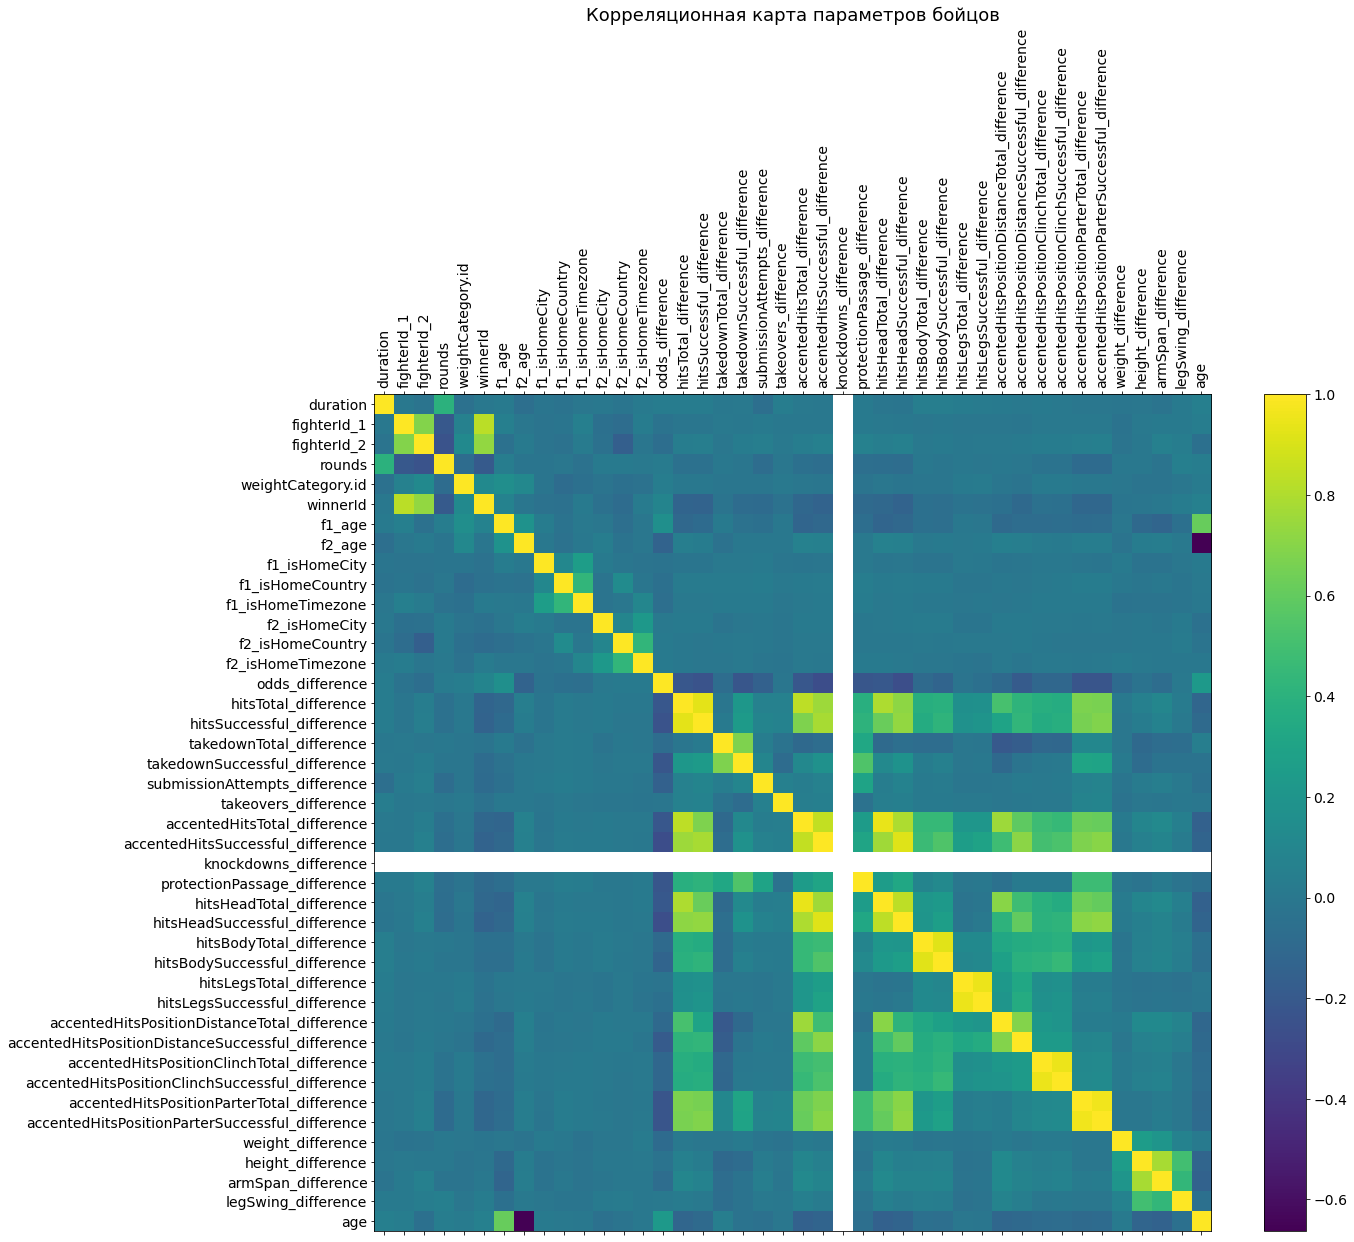

In [88]:
import matplotlib.pyplot as plt

f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=90)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Корреляционная карта параметров бойцов', fontsize=18);
# plt.savefig('foo.png')

In [317]:
import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

cdf = df[['weightCategory.name', 'winMethods', 'id']].groupby(['weightCategory.name', 'winMethods']).count().reset_index()
cdf1 = df[['weightCategory.name', 'id']].groupby(['weightCategory.name']).count().reset_index()
cdf2 = df[['winMethods', 'id']].groupby(['winMethods']).count().reset_index()
from plotly.offline import init_notebook_mode, plot_mpl
# 1-й уровень, центр диаграммы
labels = ["Всего событий: " + str(sum(cdf.id))]
parents = [""]
values = [sum(cdf.id)]

# 2-й уровень, "промежуточный"
second_level_dict = {x:cdf1['weightCategory.name'][x] + ' ' + str(cdf1.id[x]) for x in cdf1.index}
labels += map(lambda x: second_level_dict[x], cdf1.index)
parents += [labels[0]]*len(cdf1)
values += cdf1.id.tolist()

fig = go.Figure(go.Sunburst(
    labels = labels,
    parents = parents,
    values=values,
    branchvalues="total"
))
fig.update_layout(margin = dict(t=0, l=0, r=0, b=0))

fig.show()

Unsupported

In [322]:
cdf = df[['weightCategory.name', 'winMethods', 'id']].groupby(['weightCategory.name', 'winMethods']).count().reset_index()
cdf1 = df[['weightCategory.name', 'id']].groupby(['weightCategory.name']).count().reset_index()
cdf2 = df[['winMethods', 'id']].groupby(['winMethods']).count().reset_index()
from plotly.offline import init_notebook_mode, plot_mpl
# 1-й уровень, центр диаграммы
labels = ["Всего событий: " + str(sum(cdf.id))]
parents = [""]
values = [sum(cdf.id)]

# 2-й уровень, "промежуточный"
second_level_dict = {x:cdf2['winMethods'][x] + ' ' + str(cdf2.id[x]) for x in cdf2.index}
labels += map(lambda x: second_level_dict[x], cdf2.index)
parents += [labels[0]]*len(cdf2)
values += cdf2.id.tolist()

fig = go.Figure(go.Sunburst(
    labels = labels,
    parents = parents,
    values=values,
    branchvalues="total"
))
fig.update_layout(margin = dict(t=0, l=0, r=0, b=0))

fig.show()

Unsupported